In [ ]:
type Boundary
    shape::Function
    tangent::Function
    normal::Function
            

In [1]:
using ForwardDiff
import ForwardDiff.derivative
using NLsolve

In [2]:
#using Plots
#pyplot(leg=false, size=(500,300))
#n = 10
#y = rand(n)
#vx, vy = randn(n), randn(n)
#quiver(y, quiver=(vx,vy))

In [3]:
function normal(b::Function, x)
    f = y -> derivative(b,y)
    normalization = (1 + f(x)^2)^(1/2)
    [f(x)/normalization, 1/normalization]
end

function tangent(b::Function, x)
    f = y -> derivative(b,y)
    normalization = (1 + f(x)^2)^(1/2)
    [-1/normalization, f(x)/normalization]
end



tangent (generic function with 1 method)

In [4]:
boundary(x; s = 1.0) = sin(s*x)

boundary (generic function with 1 method)

In [21]:
x = -4*pi:0.01:2*pi
n = [normal(boundary, i) for i in x]
t = [tangent(boundary, i) for i in x];

In [22]:
using PyPlot

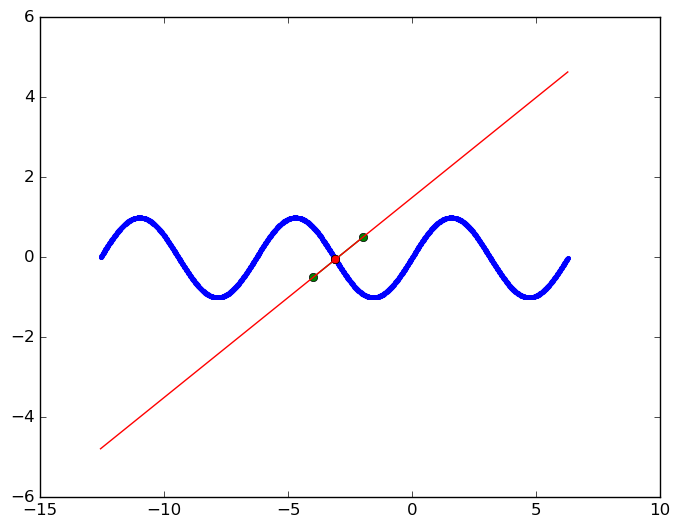

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9c402e2190>

In [23]:
plot(x,boundary(x),".-")
plot([-4,-2.],[-0.5,0.5],"o-")
plot(a,boundary(a),"ro")
plot(a,slop(a),"ro")
plot(x,slop(x))

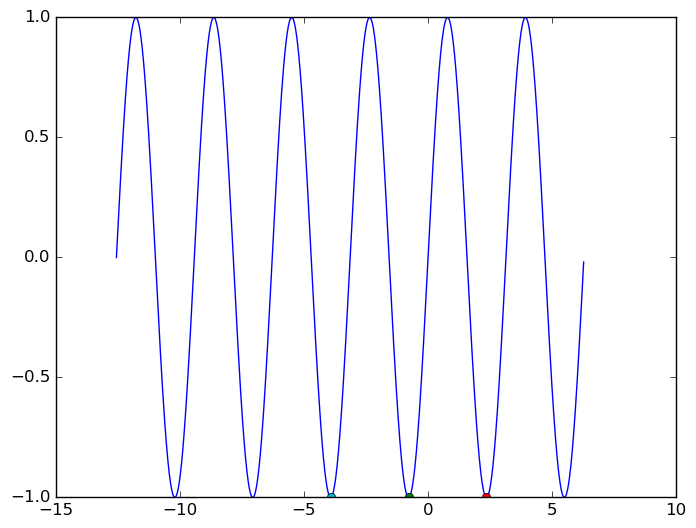

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9c3ff0fdd0>

In [30]:
plot(x,sin(2*x))
plot(-pi/4,sin(2*(-pi/4)),"o")
plot(3*pi/4,sin(2*(3*pi/4)),"o")
plot(-pi/4-pi,sin(2*(-pi/4)),"o")

In [7]:
x1, y1 = [-4.,-0.5]
x2, y2 = [-2.,0.5];
m = (y2-y1)/(x2-x1)
slop(x) = m*(x-x2) + y2

slop (generic function with 1 method)

In [9]:
function f!(x)
    m = (y2-y1)/(x2-x1)
    boundary(x)-slop(x)
end

f! (generic function with 1 method)

In [10]:
using Roots

In [16]:
a = fzero(f!,x1)
sin(a)

-0.04719170652463839

In [17]:
a, slop(a)

(-3.094383413049278,-0.047191706524639)

In [18]:
boundary(a)

-0.04719170652463839

In [19]:
slop(a)

-0.047191706524639

In [24]:
type Particle{T}
    r::Array{T,1}  #[x, y]
    rprevious::Array{T,1} #[x,y]
end

In [56]:
sig = 2
a = 2*pi/(2*sig)
b = a + 2*pi/(sig)
c = b - 3*pi/(2*sig)
Int(div(c, (2*pi/sig)) + 1)
k = -5.
Int(div(k + pi/(2*sig), (2*pi/sig)) -1)

-2

In [59]:
function previouscelda(p :: Particle; lambda = 0.8, sigma = 0.1)

            if -pi/(2*sigma) < p.rprevious[1] < 3*pi/(2*sigma)
                prevcelda = 0
            elseif p.rprevious[1] > 3*pi/(2*sigma)
                a = p.rprevious[1] - 3*pi/(2*sigma)
                prevcelda = div(c,(2*pi/sig)) + 1
            else
                a = p.rprevious[1] + pi/(2*sigma)
                prevcelda = Int(div(k + pi/(2*sig), (2*pi/sig)) -1)
            end
    
    prevcelda
end

previouscelda (generic function with 1 method)

In [60]:
function currentcelda(p :: Particle; lambda = 0.8, sigma = 0.1)

            if -pi/(2*sigma) < p.r[1] < 3*pi/(2*sigma)
                celda = 0
            elseif p.r[1] > 3*pi/(2*sigma)
                a = p.r[1] - 3*pi/(2*sigma)
                celda = div(c,(2*pi/sig)) + 1
            else
                a = p.r[1] + pi/(2*sigma)
                celda = Int(div(k + pi/(2*sig), (2*pi/sig)) -1)
            end
    
    celda
end

currentcelda (generic function with 1 method)

In [50]:
function boundarysine(p :: Particle; lambda = 0.8, sigma = 0.1)
    if p.rprevious[2] > 1. - lambda
        prevcelda = previouscelda(p)
    end
    if p.r[2] > 1. - lambda
        currcelda = currentcelda(p)
    end
    
    if (abs(currcelda - prevcelda) >= 1) && (incell(p))
        restart(simulation)
    end
end
        
        


LoadError: LoadError: syntax: incomplete: premature end of input
while loading In[50], in expression starting on line 1